In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv(r'C:\Users\usrer\ML-task\datasets\bank+marketing\bank\bank.csv',sep=';')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [9]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

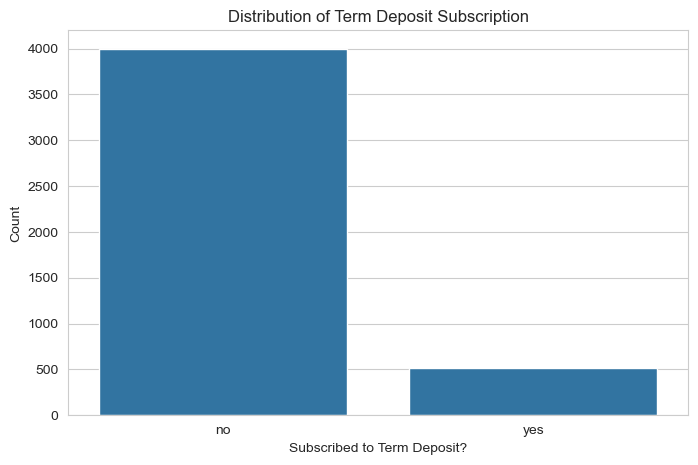

In [10]:

plt.figure(figsize=(8, 5))
sns.countplot(x='y', data=data)
plt.title('Distribution of Term Deposit Subscription')
plt.xlabel('Subscribed to Term Deposit?')
plt.ylabel('Count')
plt.show()

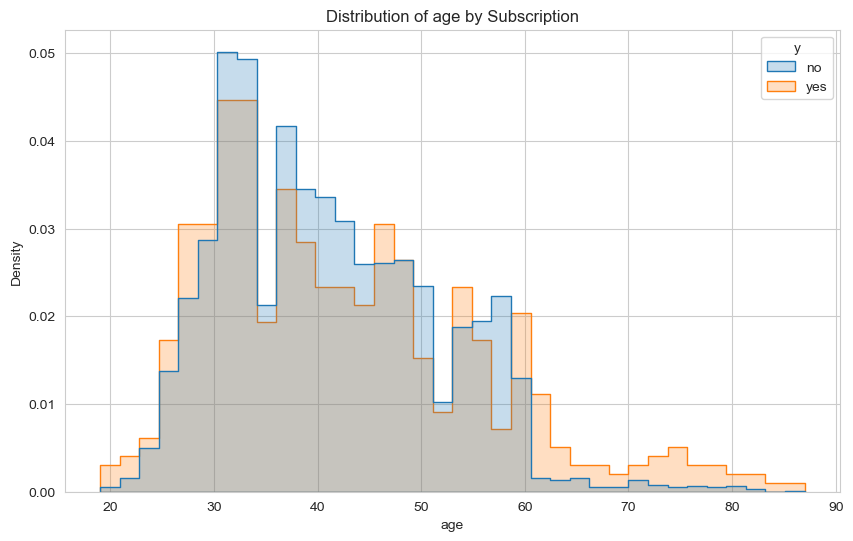

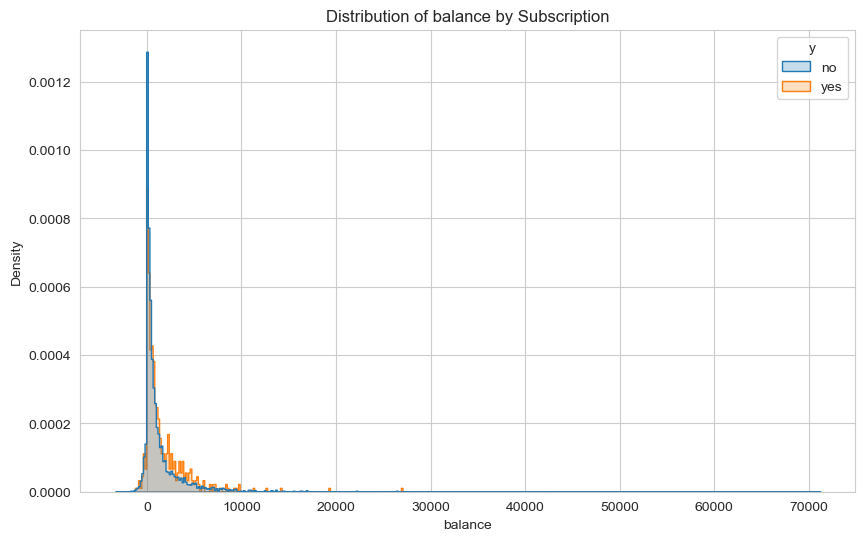

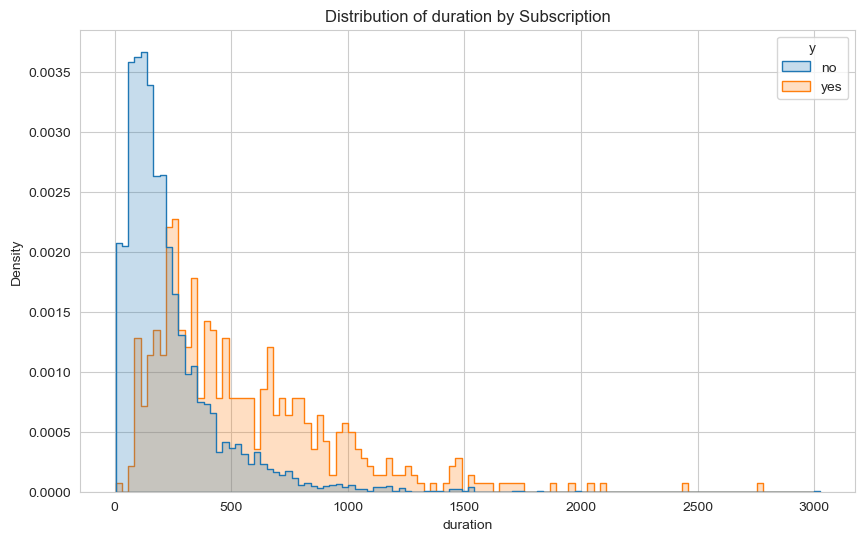

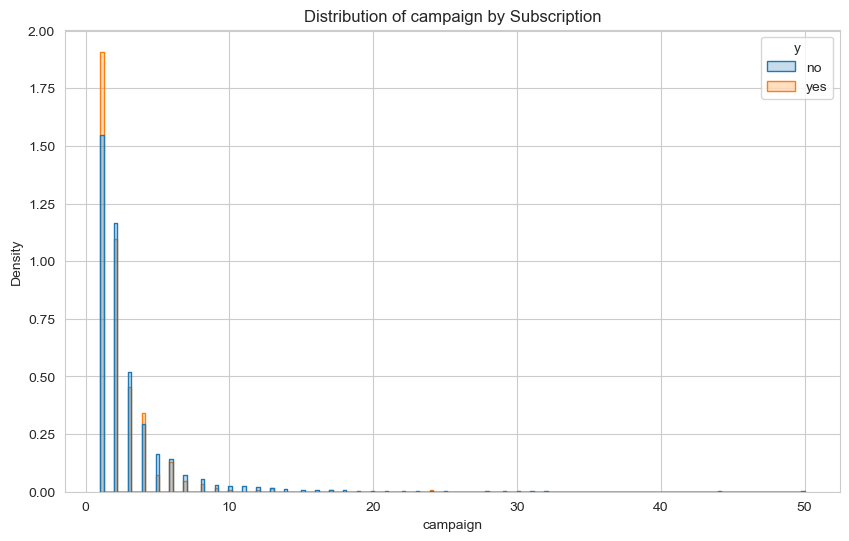

In [11]:

num_cols = ['age', 'balance', 'duration', 'campaign']


for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=col, hue='y', element='step', stat='density', common_norm=False)
    plt.title(f'Distribution of {col} by Subscription')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

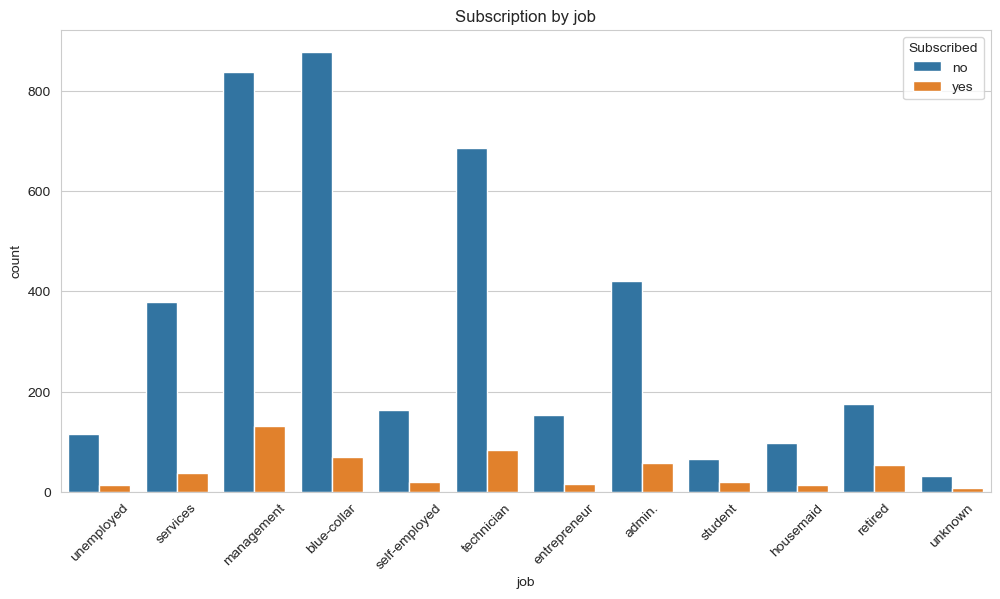

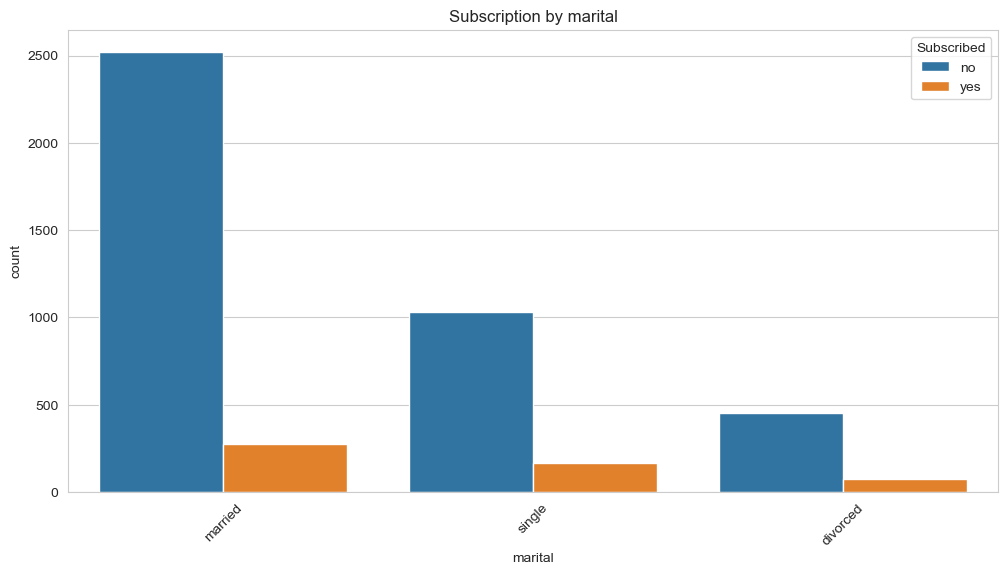

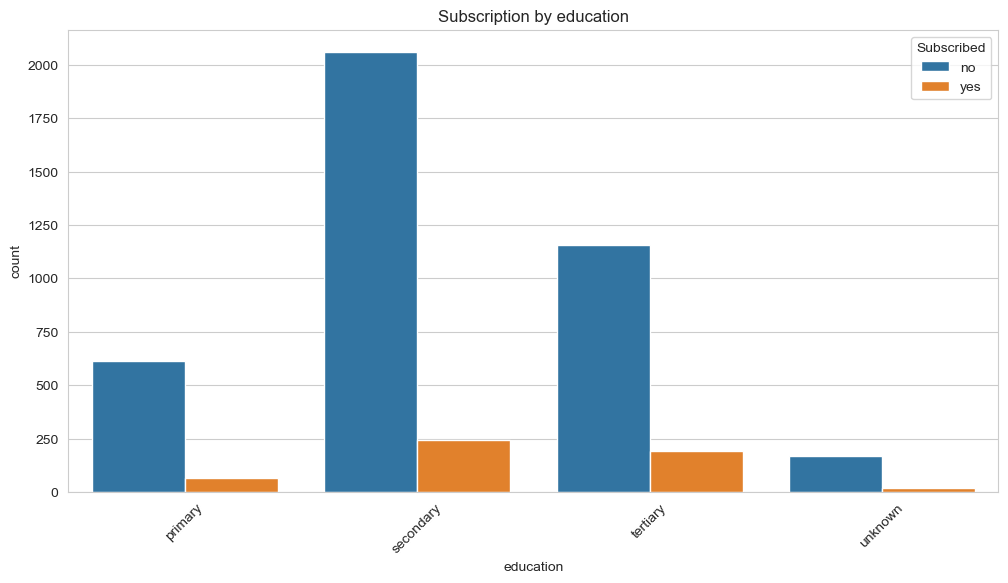

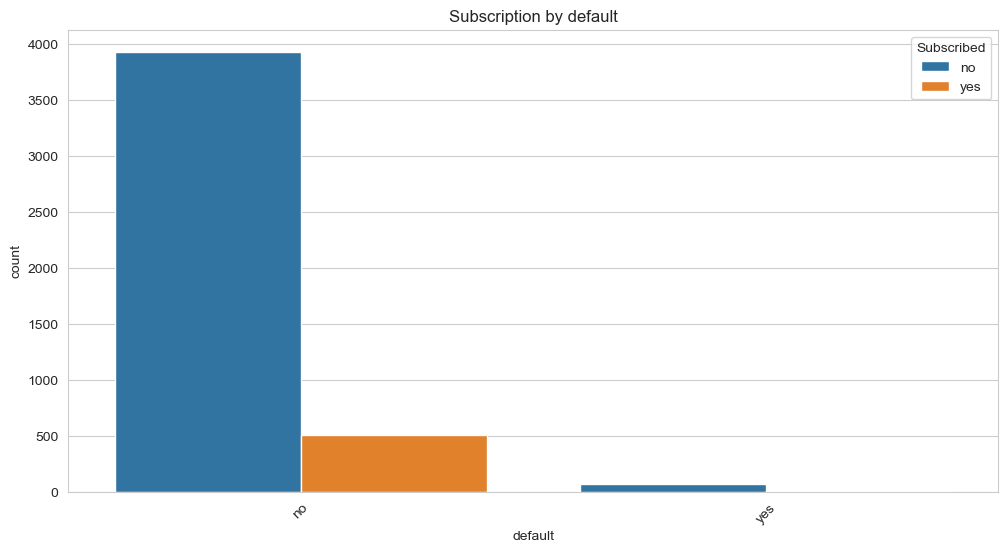

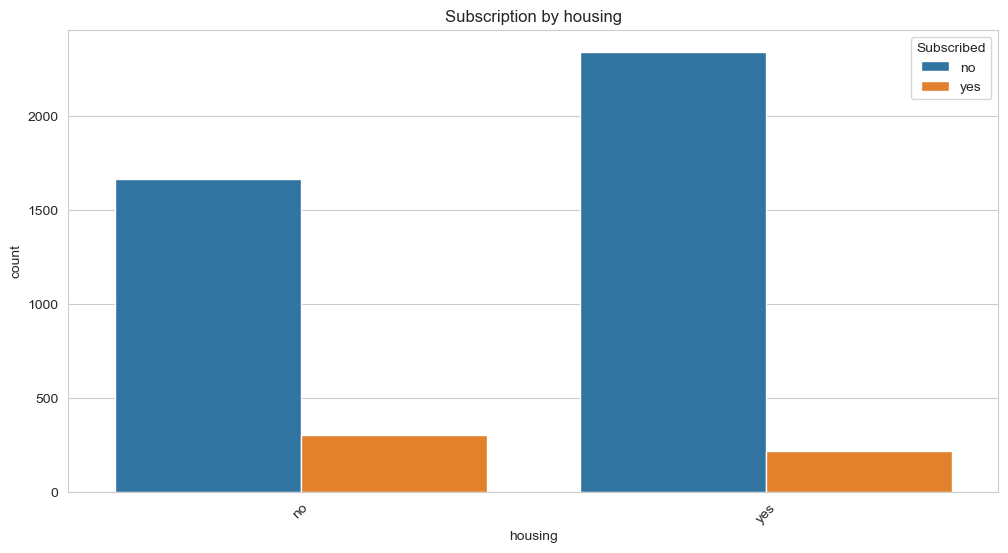

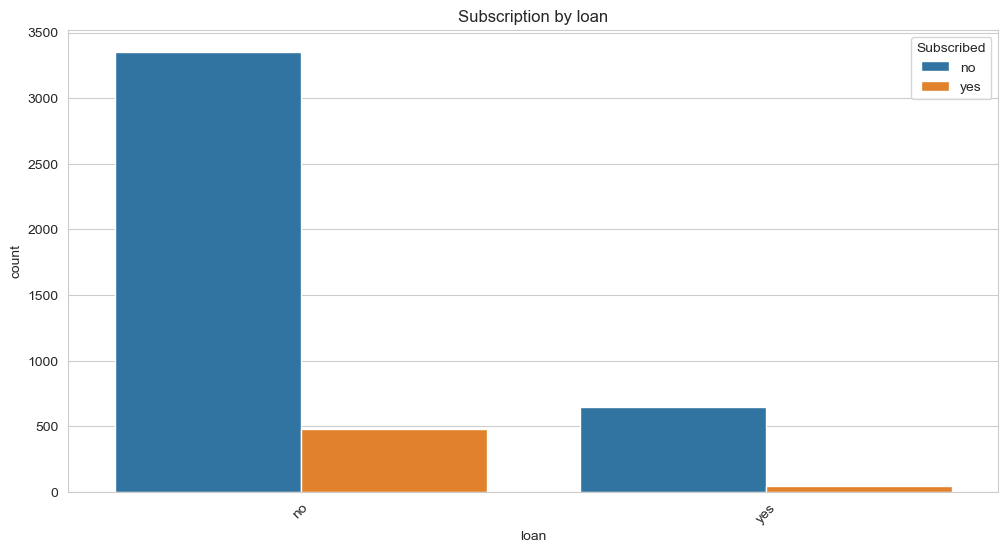

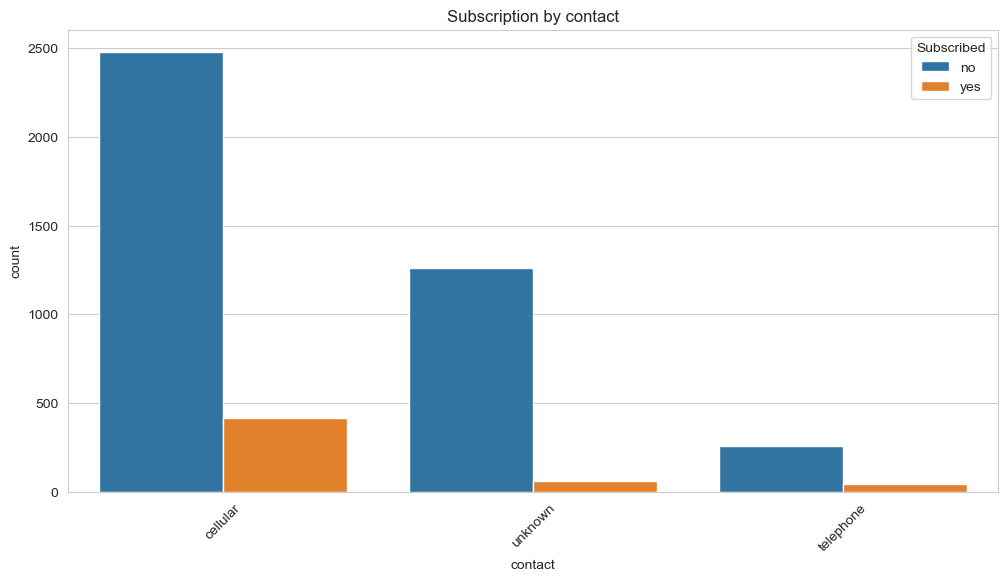

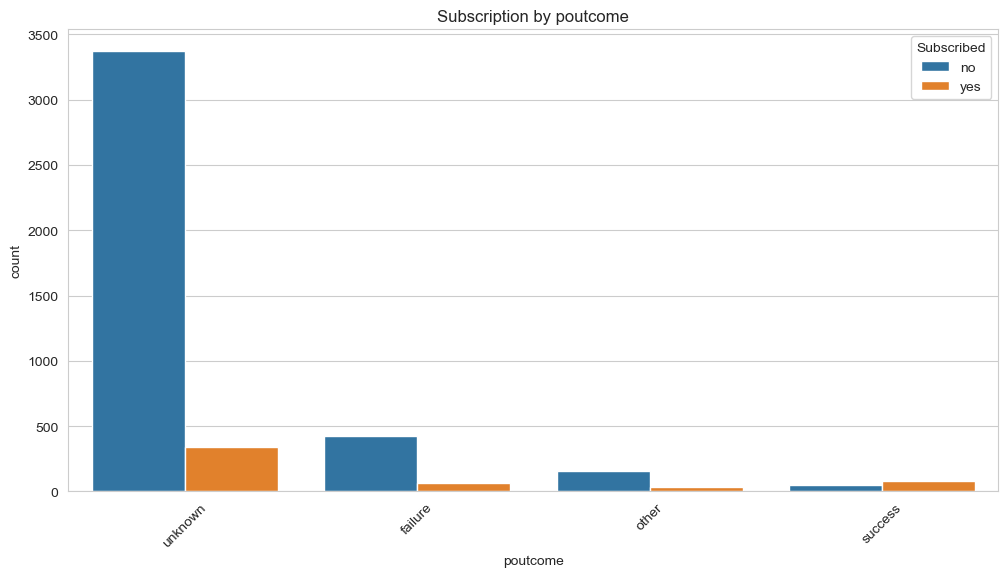

In [12]:

cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

for col in cat_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=col, hue='y', data=data)
    plt.title(f'Subscription by {col}')
    plt.xticks(rotation=45)
    plt.legend(title='Subscribed', loc='upper right')
    plt.show()

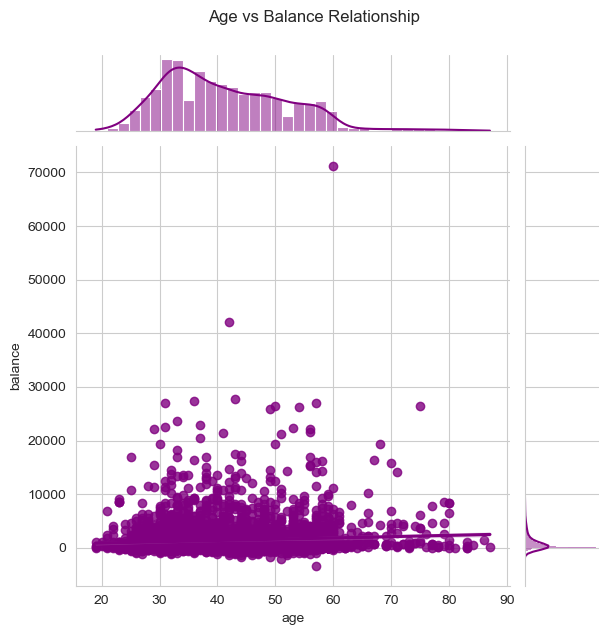

In [13]:
sns.jointplot(x='age', y='balance', data=data, color='purple', kind='reg')
plt.suptitle('Age vs Balance Relationship', y=1.05)
plt.show()

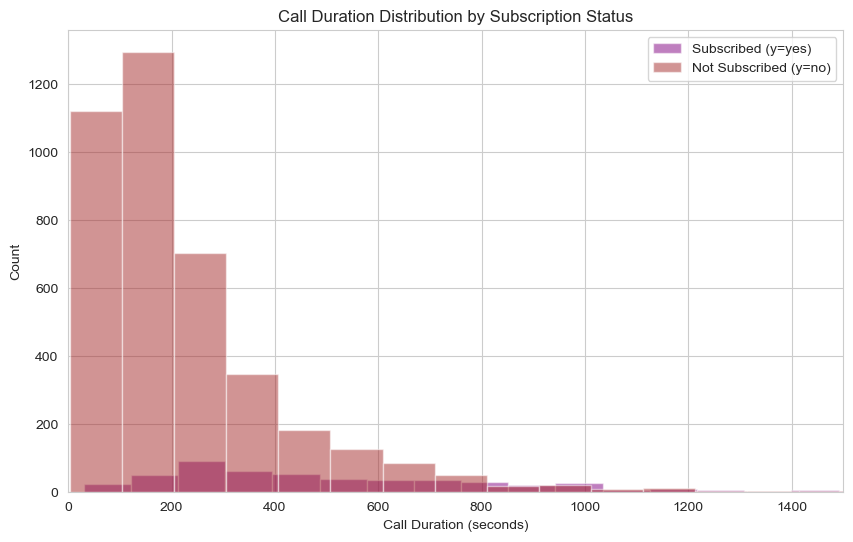

In [14]:
plt.figure(figsize=(10,6))

data[data['y']=='yes']['duration'].hist(
    alpha=0.5, color='purple', bins=30,
    label='Subscribed (y=yes)'
)

data[data['y']=='no']['duration'].hist(
    alpha=0.5, color='brown', bins=30,
    label='Not Subscribed (y=no)'
)

plt.legend()
plt.xlabel('Call Duration (seconds)')
plt.ylabel('Count')
plt.title('Call Duration Distribution by Subscription Status')
plt.xlim(0, 1500)  
plt.show()

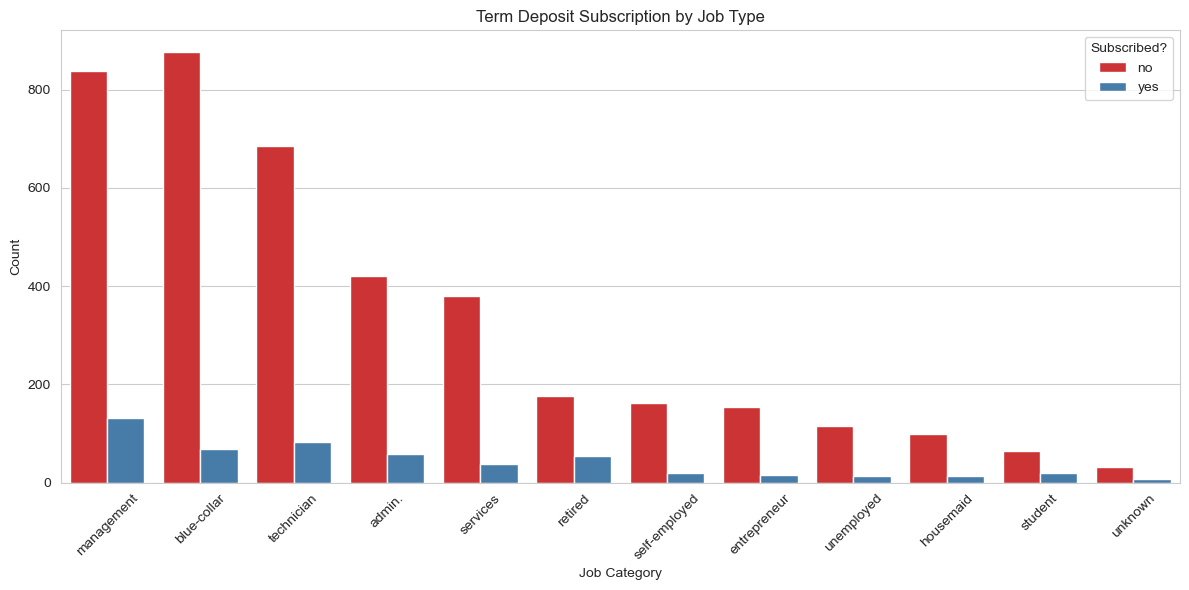

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(
    x='job', 
    hue='y', 
    data=data, 
    palette='Set1',
    order=data['job'].value_counts().index  
)
plt.title('Term Deposit Subscription by Job Type')
plt.xlabel('Job Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Subscribed?')
plt.tight_layout()
plt.show()

<Figure size 1100x700 with 0 Axes>

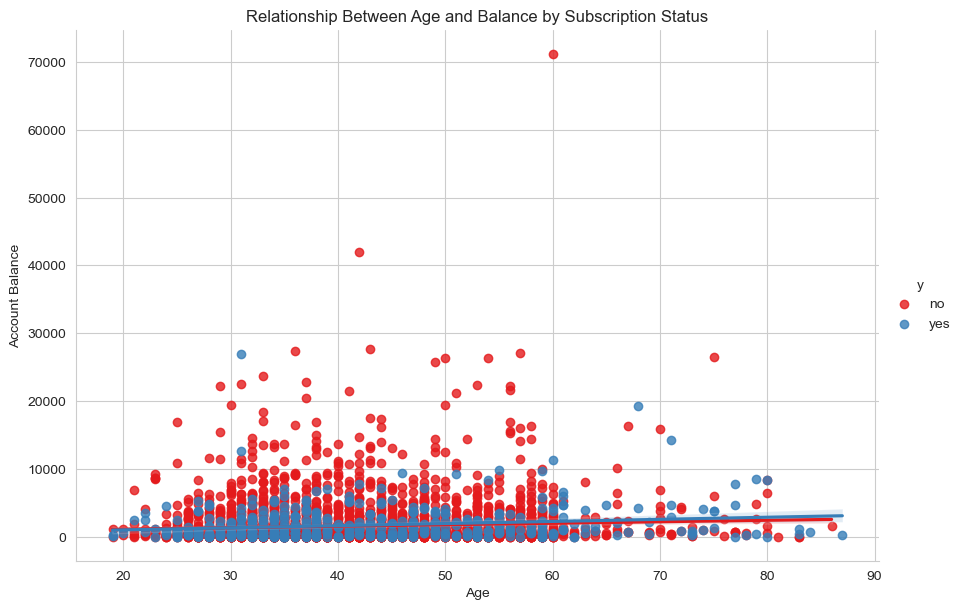

In [16]:
plt.figure(figsize=(11,7))
sns.lmplot(
    x='age', 
    y='balance', 
    data=data[data['balance'] >= 0], 
    hue='y', 
    palette='Set1',
    height=6,
    aspect=1.5
)
plt.title('Relationship Between Age and Balance by Subscription Status')
plt.xlabel('Age')
plt.ylabel('Account Balance')
plt.show()

In [17]:
cat_feats = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

In [18]:

final_data = pd.get_dummies(data, columns=cat_feats, drop_first=True)

final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  4521 non-null   int64 
 1   balance              4521 non-null   int64 
 2   day                  4521 non-null   int64 
 3   duration             4521 non-null   int64 
 4   campaign             4521 non-null   int64 
 5   pdays                4521 non-null   int64 
 6   previous             4521 non-null   int64 
 7   y                    4521 non-null   object
 8   job_blue-collar      4521 non-null   bool  
 9   job_entrepreneur     4521 non-null   bool  
 10  job_housemaid        4521 non-null   bool  
 11  job_management       4521 non-null   bool  
 12  job_retired          4521 non-null   bool  
 13  job_self-employed    4521 non-null   bool  
 14  job_services         4521 non-null   bool  
 15  job_student          4521 non-null   bool  
 16  job_te

In [19]:
final_data['y'] = final_data['y'].map({'yes': 1, 'no': 0})

In [20]:
print("\nNew columns after one-hot encoding:")
print(final_data.columns.tolist())

print(f"\nOriginal shape: {data.shape}")
print(f"Transformed shape: {final_data.shape}")


New columns after one-hot encoding:
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'education_secondary', 'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']

Original shape: (4521, 17)
Transformed shape: (4521, 43)


In [22]:
top_jobs = data['job'].value_counts().nlargest(5).index
data['job'] = data['job'].where(data['job'].isin(top_jobs), 'other')

In [23]:
from sklearn.model_selection import train_test_split

X = final_data.drop('y', axis=1)  
y = final_data['y'] 

In [24]:

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.30, 
    random_state=42,  
    stratify=y  
)

In [25]:
print(f"Original dataset shape: {final_data.shape}")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

print("\nClass distribution in full dataset:")
print(y.value_counts(normalize=True))

print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))

print("\nClass distribution in testing set:")
print(y_test.value_counts(normalize=True))

Original dataset shape: (4521, 43)
Training set shape: (3164, 42)
Testing set shape: (1357, 42)

Class distribution in full dataset:
y
0    0.88476
1    0.11524
Name: proportion, dtype: float64

Class distribution in training set:
y
0    0.88464
1    0.11536
Name: proportion, dtype: float64

Class distribution in testing set:
y
0    0.885041
1    0.114959
Name: proportion, dtype: float64


In [28]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(X_train, y_train)

Accuracy: 0.8607221812822402

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1205
           1       0.37      0.36      0.36       152

    accuracy                           0.86      1357
   macro avg       0.65      0.64      0.64      1357
weighted avg       0.86      0.86      0.86      1357


Confusion Matrix:
[[1114   91]
 [  98   54]]


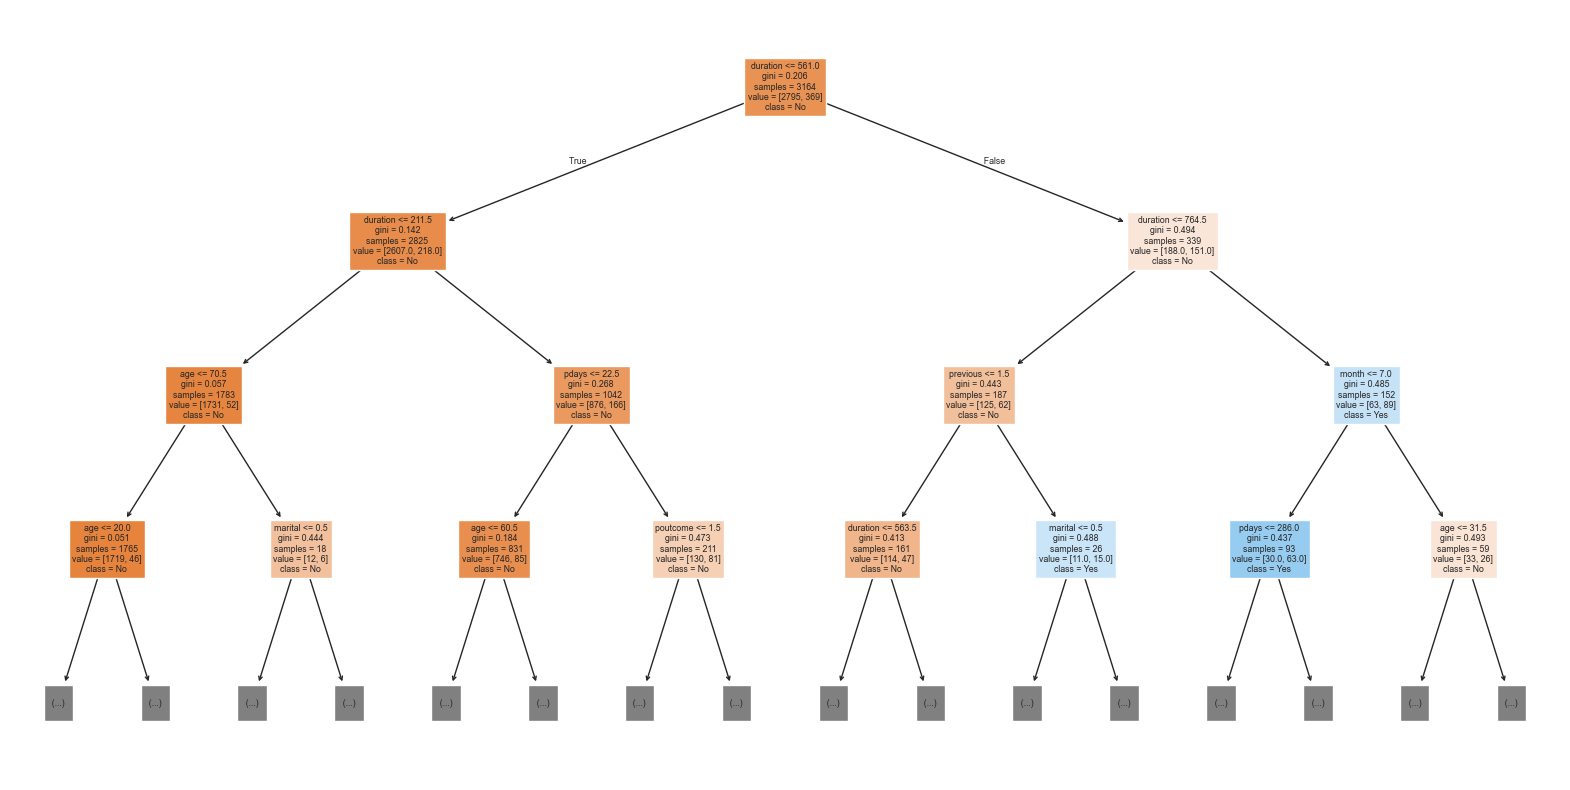

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

label_encoders = {}
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

X = data.drop('y', axis=1)
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

plt.figure(figsize=(20,10))
tree.plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], max_depth=3)
plt.show()

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                          param_grid, 
                          cv=5, 
                          scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_dt = grid_search.best_estimator_

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


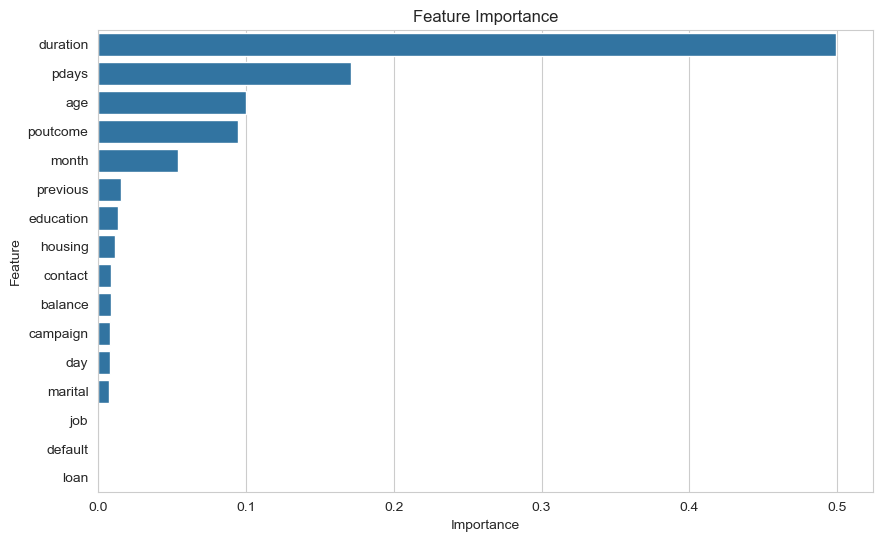

In [31]:
importances = best_dt.feature_importances_

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

basic_dtree = DecisionTreeClassifier()
basic_dtree.fit(X_train, y_train)
basic_predictions = basic_dtree.predict(X_test)

print("Basic Decision Tree Performance:")
print(classification_report(y_test, basic_predictions))
print(confusion_matrix(y_test, basic_predictions))


param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}

tuned_dtree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='f1')
tuned_dtree.fit(X_train, y_train)

print("\nBest Parameters:", tuned_dtree.best_params_)
best_dtree = tuned_dtree.best_estimator_


tuned_predictions = best_dtree.predict(X_test)

print("\nTuned Decision Tree Performance:")
print(classification_report(y_test, tuned_predictions))
print(confusion_matrix(y_test, tuned_predictions))


importances = best_dtree.feature_importances_
features = X_train.columns
feature_importance = pd.DataFrame({'feature': features, 'importance': importances})
print("\nFeature Importance:")
print(feature_importance.sort_values('importance', ascending=False))

Basic Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1205
           1       0.37      0.36      0.36       152

    accuracy                           0.86      1357
   macro avg       0.64      0.64      0.64      1357
weighted avg       0.86      0.86      0.86      1357

[[1113   92]
 [  98   54]]

Best Parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}

Tuned Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.97      0.72      0.83      1205
           1       0.27      0.84      0.41       152

    accuracy                           0.73      1357
   macro avg       0.62      0.78      0.62      1357
weighted avg       0.89      0.73      0.78      1357

[[866 339]
 [ 24 128]]

Feature Importance:
      feature  importance
11   duration     0.83488
8     contact     0.16